<a href="https://colab.research.google.com/github/mounesi/pa/blob/master/notebooks/regressionAnalysisIrvingtonVillage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cp drive/My\ Drive/data/pa/dataIrvingtonVillage/data_count_mv.csv ./data.csv

In [ ]:
import pandas as pd
df = pd.read_csv('data.csv', index_col=0)
df['PCI'] = ['great' if (x > 8) else 'good' if (x > 6 and x <= 8) else 'fine' if (x > 4 and x <= 6) else 'poor' for x in df['Pavement Rate Overall']]
df['maintenance level'] = ['intact road' if (x > 8) else 'routine maintenance' if (x > 6 and x <= 8) else 'rehabilitation' if (x > 4 and x <= 6) else 'reconstruction' for x in df['Pavement Rate Overall']]

df.head()

,ROAD NAME,geo_loc,crack_count,machine_vision_prediction,LENGTH\n(FT),AVERAGE WIDTH (FT),AREA (SF),AREA (SY),Year RESURFACED,Pavement Rate Total,Pavement Rate Overall,Latitude,Longitude,coords,geometry,PCI,maintenance level
num,,,,,,,,,,,,,,,,,
I,AQUEDUCT LANE,"41.039262, -73.866576",1,8.143537,215.0,21.0,4515.0,501.67,1993.0,9.35,9.0,41.039262,-73.866576,"(-73.866576, 41.039262)",POINT (-73.86657599999999 41.039262),great,intact road
2,ARDSLEY AVE. EAST,"41.025517, -73.866235",12,2.710748,885.0,20.0,17700.0,1966.67,1994.0,4.50,5.0,41.025517,-73.866235,"(-73.866235, 41.025517)",POINT (-73.866235 41.025517),fine,rehabilitation
3,ARDSLEY AVE. WEST*,"41.025593, -73.872857",2,7.368577,2764.0,20.0,55280.0,6142.22,1992.0,6.80,7.0,41.025593,-73.872857,"(-73.872857, 41.025593)",POINT (-73.872857 41.025593),good,routine maintenance
4,BARBARA LANE*,"41.042897, -73.854404",2,7.368577,591.0,23.0,13593.0,1510.33,2009.0,8.30,8.0,41.042897,-73.854404,"(-73.854404, 41.042897)",POINT (-73.854404 41.042897),good,routine maintenance
5,BEECHWOOD LANE*,"41.027831, -73.865263",3,6.667364,1636.0,24.0,39264.0,4362.67,2001.0,8.30,8.0,41.027831,-73.865263,"(-73.865263, 41.027831)",POINT (-73.865263 41.027831),good,routine maintenance


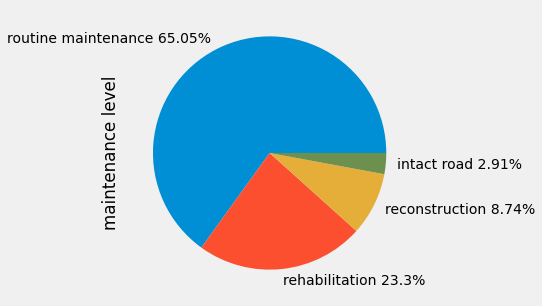

In [ ]:
#df3 = df
#df3.set_index('PCI')
df3 = df['maintenance level'].value_counts()
df3['intact road']
coef = round(df3['intact road']/len(df['maintenance level']),4)*100
df3.rename(index = {'intact road': f'intact road {coef}%'}, inplace = True)
coef = round(df3['routine maintenance']/len(df['maintenance level']),4)*100
df3.rename(index = {'routine maintenance': f'routine maintenance {coef}%'}, inplace = True)
coef = round(df3['rehabilitation']/len(df['maintenance level']),4)*100
df3.rename(index = {'rehabilitation': f'rehabilitation {coef}%'}, inplace = True)
coef = round(df3['reconstruction']/len(df['maintenance level']),4)*100
df3.rename(index = {'reconstruction': f'reconstruction {coef}%'}, inplace = True)


plot = df3.plot.pie(y='Pavement Rate Overall', figsize=(5, 5))

In [ ]:
df3 = df['maintenance level'].value_counts()

23.3

In [126]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(df['Pavement Rate Overall']) # Regression
#labels = np.array(df['PCI']) # classification
df2= df[['AREA (SF)','crack_count','Year RESURFACED']]

df2.head()

,AREA (SF),crack_count,Year RESURFACED
num,,,
I,4515.0,1,1993.0
2,17700.0,12,1994.0
3,55280.0,2,1992.0
4,13593.0,2,2009.0
5,39264.0,3,2001.0


In [127]:
# Saving feature names for later use
feature_list = list(df2.columns)
# Convert to numpy array
df2 = np.array(df2)

In [128]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df2, labels, test_size = 0.5, random_state = 42)

In [129]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (51, 3)
Training Labels Shape: (51,)
Testing Features Shape: (52, 3)
Testing Labels Shape: (52,)


#Regression

In [133]:
# Random Forest Regression

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'rate.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


from sklearn.metrics import r2_score
print(f'r2: {r2_score(test_labels, predictions)}')

Mean Absolute Error: 1.37 rate.
Accuracy: 77.24 %.
r2: -0.49874750680479374


In [131]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_features, train_labels)
predictions = lr.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'rate.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
from sklearn.metrics import r2_score
print(f'r2: {r2_score(test_labels, predictions)}')

Mean Absolute Error: 1.1 rate.
Accuracy: 81.31 %.
r2: 0.00607058715558495


In [132]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(train_features, train_labels)

predictions = clf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'rate.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
from sklearn.metrics import r2_score
print(f'r2: {r2_score(test_labels, predictions)}')

Mean Absolute Error: 0.92 rate.
Accuracy: 81.8 %.
r2: -0.1407678244972579


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [134]:
#predictions = clf.predict(test_features)
predictions = rf.predict(df2)

In [135]:
predictions

array([6.352, 5.864, 6.651, 7.253, 6.63 , 7.415, 7.318, 5.43 , 6.919,
       7.324, 7.718, 4.49 , 6.878, 6.431, 7.256, 5.464, 6.811, 7.055,
       7.131, 5.698, 5.611, 7.814, 6.906, 6.959, 4.107, 6.669, 6.951,
       6.959, 7.582, 7.394, 6.987, 6.586, 7.72 , 7.299, 6.638, 5.662,
       7.347, 7.176, 5.217, 7.726, 6.512, 5.541, 6.691, 5.779, 5.366,
       6.419, 7.013, 7.399, 7.192, 5.534, 7.585, 6.382, 5.775, 6.565,
       7.726, 6.511, 7.951, 6.753, 6.963, 7.055, 5.664, 5.652, 6.733,
       5.938, 6.593, 6.396, 6.971, 7.657, 5.782, 7.623, 5.484, 7.314,
       5.147, 5.157, 7.112, 6.626, 8.271, 5.045, 5.962, 6.068, 5.471,
       7.153, 8.457, 6.88 , 6.153, 7.299, 5.398, 5.268, 4.73 , 4.416,
       4.797, 4.127, 7.16 , 6.317, 4.969, 6.7  , 6.982, 5.893, 5.4  ,
       3.934, 5.798, 8.252, 7.247])

In [120]:
# SGD Regression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

reg.fit(train_features, train_labels)

predictions = reg.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'rate.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

from sklearn.metrics import r2_score
print(f'r2: {r2_score(test_labels, predictions)}')

Mean Absolute Error: 1.18 rate.
Accuracy: 80.4 %.
r2: -0.07265053548993494


In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(random_state=0)
cross_val_score(clf, train_features, train_labels, cv=5, scoring='recall_macro')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.16666667, 0.2       , 0.25      , 0.25      , 0.2       ])

In [ ]:
df_scores = pd.DataFrame()
df_scores['Random Forest Regression'] = 1.37, 77.24
df_scores['Linear Regression'] = 1.1, 81.31
df_scores['Logistic Regression'] = 0.92, 81.8
df_scores['SGD Regression'] = 1.13, 81.06
df_scores.rename(index = {0: 'Mean Absolute Error[rate]'}, inplace = True)
df_scores.rename(index = {1: 'Accuracy[%]'}, inplace = True)

#df_new = df.rename(columns={'A': 'a'}, index={'ONE': 'one'})

df_scores

,Random Forest Regression,Linear Regression,Logistic Regression,SGD Regression
Mean Absolute Error[rate],1.37,1.10,0.92,1.13
Accuracy[%],77.24,81.31,81.80,81.06


In [ ]:
df_scores.to_csv('model rates')

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_features, train_labels)
predictions = lr.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'rate.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.07 rate.
Accuracy: 82.24 %.


In [ ]:
predictions

array([6.77270829, 6.88388677, 5.98535528, 6.82335694, 6.78167574,
       6.06851249, 6.50161144, 6.87608127, 6.87929083, 6.74939266,
       6.87272531, 6.74306373, 6.83523758, 7.00983442, 7.05630691,
       6.27646413, 6.52029026, 6.91871054, 6.65245098, 6.97809319,
       6.51850463, 6.27294894, 6.73218406, 6.33545243, 5.99465747,
       6.56461252])

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Year RESURFACED      Importance: 0.51
Variable: crack_count          Importance: 0.49


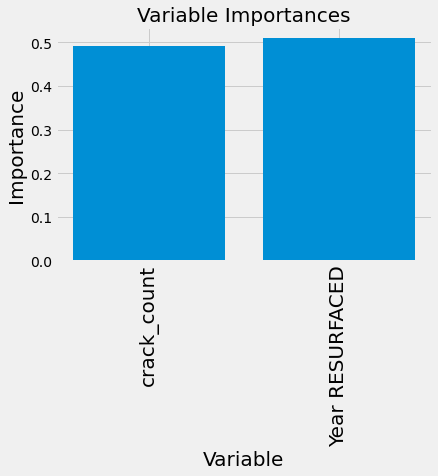

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical', fontsize=20)
# Axis labels and title
plt.ylabel('Importance', fontsize=20); plt.xlabel('Variable', fontsize=20); plt.title('Variable Importances', fontsize=20);
#plt.xlabel('xlabel', fontsize=18)
#plt.ylabel('ylabel', fontsize=16)


In [ ]:

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('/content/small_tree.png');

#Classification

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
X_train = train_features
y_train = train_labels
X_test = test_features
y_test = test_labels


clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
#clf.predict(X_test[:2])

predictions = clf.predict(test_features)

# Calculate the absolute errors
#errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'rate.')

In [ ]:
import sklearn
sklearn.metrics.confusion_matrix(y_test, predictions)

array([[ 1,  5,  0,  0],
       [ 2, 15,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  2,  0,  0]])

In [ ]:
from sklearn.metrics import accuracy_score
acc_clf = accuracy_score(y_test, predictions)
print(f'accuracy of naive bayes ba is {acc_clf} ')

accuracy of naive bayes ba is 0.6153846153846154 


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        fine       0.33      0.17      0.22         6
        good       0.65      0.88      0.75        17
       great       0.00      0.00      0.00         1
        poor       0.00      0.00      0.00         2

    accuracy                           0.62        26
   macro avg       0.25      0.26      0.24        26
weighted avg       0.50      0.62      0.54        26



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
df_acc = pd.DataFrame()
df_acc['Random Forest Regression'] = 75.29, 77.93
df_acc['Linear Regression'] = 80.52, 80.63 
df_acc['Logsitc Regression'] = 81.87, 82.35
df_acc['SGD Regression'] = 80.63, 80.41

df_acc.rename(index = {0: 'municipality'}, inplace = True)
df_acc.rename(index = {1: 'machine vision'}, inplace = True)

df_acc

,Random Forest Regression,Linear Regression,Logsitc Regression,SGD Regression
municipality,75.29,80.52,81.87,80.63
machine vision,77.93,80.63,82.35,80.41


In [107]:
df_mape = pd.DataFrame()
df_mape['Random Forest Regression'] = 1.45, 1.35
df_mape['Linear Regression'] = 1.16, 1.15
df_mape['Logsitc Regression'] = 0.98, 0.92
df_mape['SGD Regression'] = 1.19, 1.18

df_mape.rename(index = {0: 'municipality'}, inplace = True)
df_mape.rename(index = {1: 'machine vision'}, inplace = True)

df_mape.head()

,Random Forest Regression,Linear Regression,Logsitc Regression,SGD Regression
municipality,1.45,1.16,0.98,1.19
machine vision,1.35,1.15,0.92,1.18


In [114]:
df_mape.to_csv('mape.csv', index=True)

In [115]:
df_acc.to_csv('acc.csv', index = True)

In [137]:
pred = np.array([6.352, 5.864, 6.651, 7.253, 6.63 , 7.415, 7.318, 5.43 , 6.919,
       7.324, 7.718, 4.49 , 6.878, 6.431, 7.256, 5.464, 6.811, 7.055,
       7.131, 5.698, 5.611, 7.814, 6.906, 6.959, 4.107, 6.669, 6.951,
       6.959, 7.582, 7.394, 6.987, 6.586, 7.72 , 7.299, 6.638, 5.662,
       7.347, 7.176, 5.217, 7.726, 6.512, 5.541, 6.691, 5.779, 5.366,
       6.419, 7.013, 7.399, 7.192, 5.534, 7.585, 6.382, 5.775, 6.565,
       7.726, 6.511, 7.951, 6.753, 6.963, 7.055, 5.664, 5.652, 6.733,
       5.938, 6.593, 6.396, 6.971, 7.657, 5.782, 7.623, 5.484, 7.314,
       5.147, 5.157, 7.112, 6.626, 8.271, 5.045, 5.962, 6.068, 5.471,
       7.153, 8.457, 6.88 , 6.153, 7.299, 5.398, 5.268, 4.73 , 4.416,
       4.797, 4.127, 7.16 , 6.317, 4.969, 6.7  , 6.982, 5.893, 5.4  ,
       3.934, 5.798, 8.252, 7.247])

In [139]:
len(pred)

103

In [141]:
len(labels)

103

AttributeError: ignored

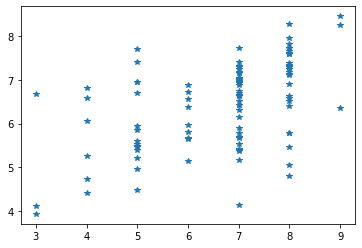

In [152]:
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)

# create some x data and some integers for the y axis
#x = np.array([3,5,2,4])
#y = np.arange(4)

# plot the data
ax.plot(labels,pred, '*')


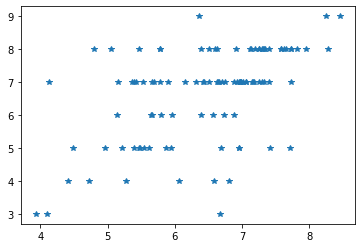

In [151]:
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)

# create some x data and some integers for the y axis
#x = np.array([3,5,2,4])
#y = np.arange(4)

# plot the data

ax.plot(pred,labels, '*')